In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('pictures/green-cropped.jpg')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [53]:
# I measured this values, they are not random

lower_red = np.array([6, 0, 220])
upper_red = np.array([179, 223, 255])

lower_yellow = np.array([0, 0, 189])
upper_yellow = np.array([179, 192, 255])

lower_green = np.array([66, 0, 217])
upper_green = np.array([179, 255, 255])

In [54]:
mask_red = cv2.inRange(hsv_img, lower_red, upper_red)
mask_yellow = cv2.inRange(hsv_img, lower_yellow, upper_yellow)
mask_green = cv2.inRange(hsv_img, lower_green, upper_green)

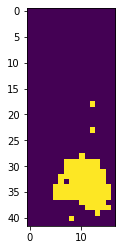

In [55]:
plt.imshow(mask_red)

In [56]:
contours, hierarchy = cv2.findContours(mask_red,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    # If we have at least one contour, look through each one and pick the biggest
if len(contours)>0:
    largest = 0
    area = 0
    for i in range(len(contours)):
        # get the area of the ith contour
        temp_area = cv2.contourArea(contours[i])
        # if it is the biggest we have seen, keep it
        if temp_area > area:
            area = temp_area
            largest = i
    # Compute the coordinates of the center of the largest contour
    coordinates = cv2.moments(contours[largest])
    print('Area', cv2.contourArea(contours[largest]))

target_y = int(coordinates['m01']/coordinates['m00'])
print(target_y)


Area 68.0
33


In [57]:
areas = img.shape[0] / 3

if target_y < areas:
    print('Red')
elif target_y > areas and target_y < areas * 2:
    print('Yellow')
elif target_y > areas * 2:
    print('Green')

Green
